In [124]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
sb.set() # set the default Seaborn style for graphics

In [125]:
data = pd.read_csv('./Dataset/shopping_trends_updated.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Prepare data by converting each objective variable in the dataset to Boolean Type

This allows categorical data be able to undergo Linear Regression

In [128]:
#Preparation of Data Frames

Y = data["Review Rating"]
X = data.drop(columns=["Size", "Payment Method", "Shipping Type", "Customer ID","Review Rating"])


Z = data.drop(columns=["Size", "Payment Method", "Shipping Type", "Customer ID","Review Rating"])
#Creating Dummy Variables for Categorical Variables 
X = pd.get_dummies(data=X, drop_first=False)
Z = pd.get_dummies(data=Z, drop_first=False)


index_list = data['Customer ID'].tolist()
column_values = pd.Series(index_list)
Z.insert(loc=0, column='Customer ID', value=column_values)


ColumnList =(X.columns.values.tolist())

In [129]:
X.head()

,Age,Purchase Amount (USD),Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,Item Purchased_Coat,...,Discount Applied_Yes,Promo Code Used_No,Promo Code Used_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,53,14,False,True,False,False,True,False,False,...,True,False,True,False,False,False,True,False,False,False
1,19,64,2,False,True,False,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,50,73,23,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,21,90,49,False,True,False,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
4,45,49,31,False,True,False,False,True,False,False,...,True,False,True,True,False,False,False,False,False,False


In [130]:
Z.head()

,Customer ID,Age,Purchase Amount (USD),Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Discount Applied_Yes,Promo Code Used_No,Promo Code Used_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,1,55,53,14,False,True,False,False,True,False,...,True,False,True,False,False,False,True,False,False,False
1,2,19,64,2,False,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,3,50,73,23,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,4,21,90,49,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
4,5,45,49,31,False,True,False,False,True,False,...,True,False,True,True,False,False,False,False,False,False


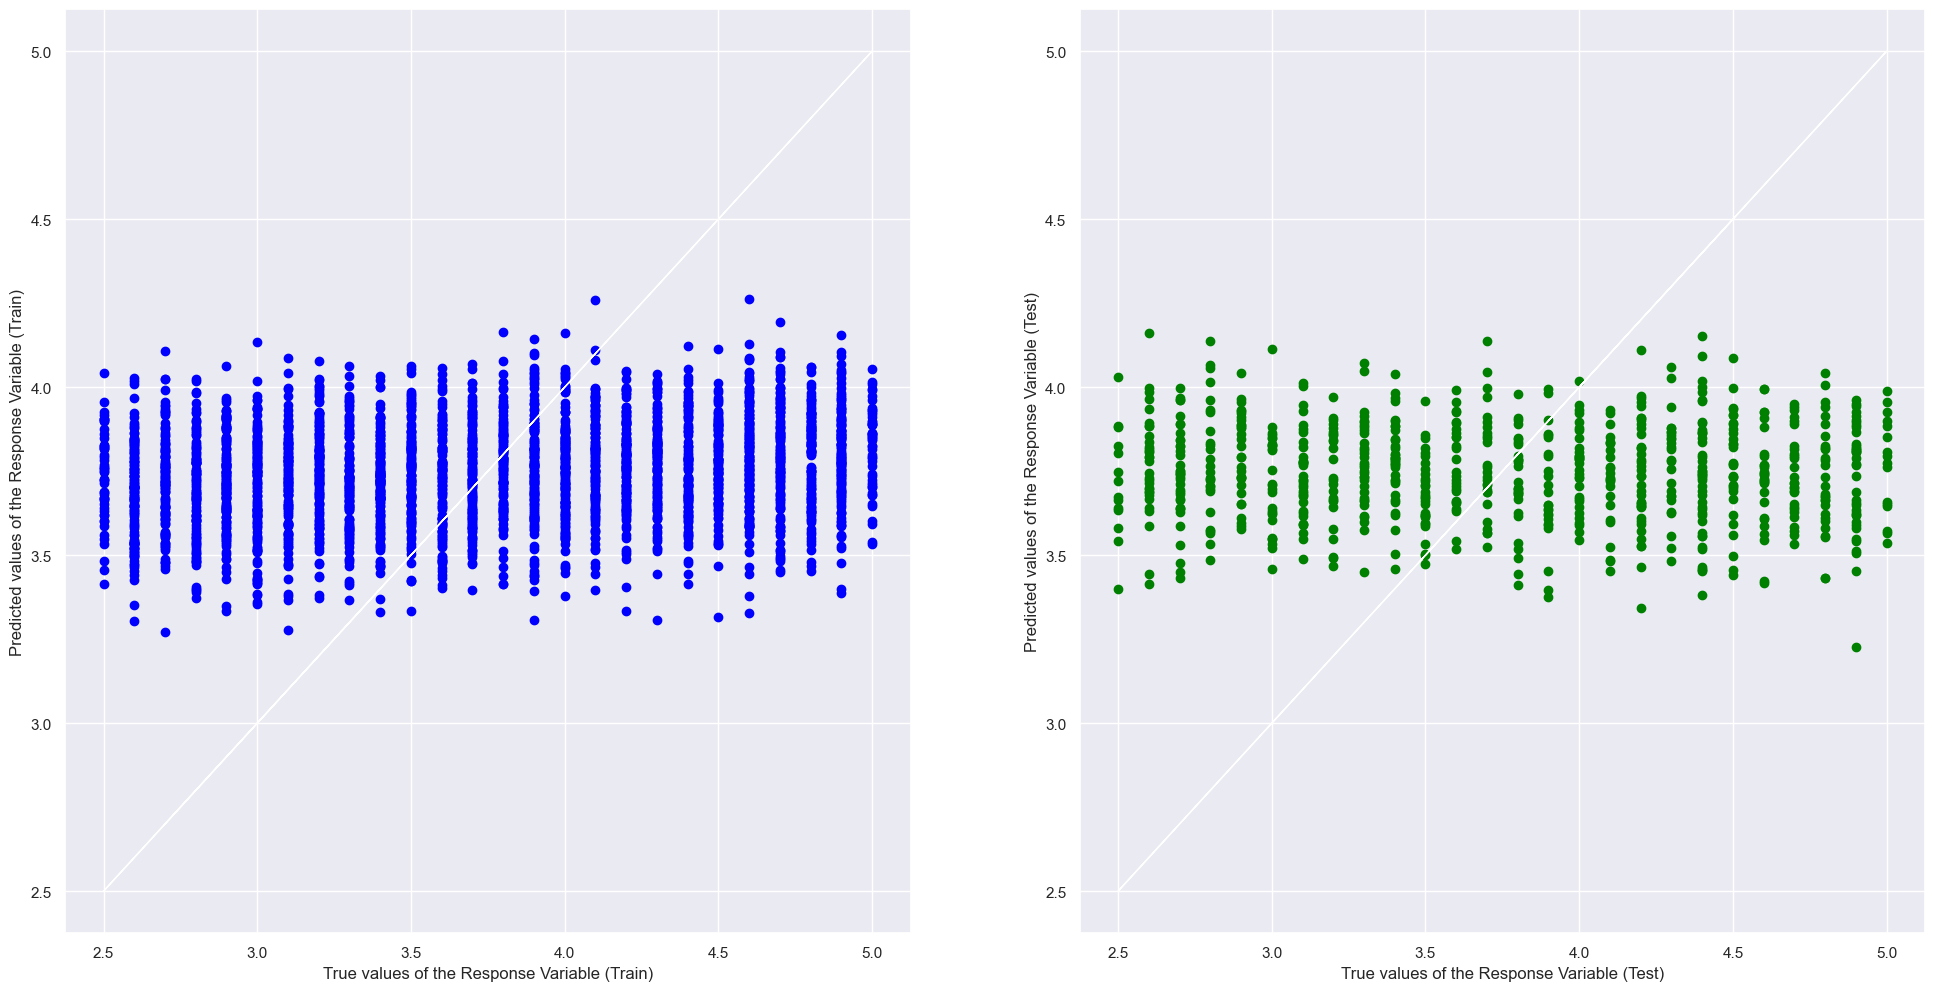

In [131]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)


#Linear Regression using Train Data
model = LinearRegression() #Create the Linear Regression Object
model.fit(X_train,y_train) #Train the Linear Regression Model



# Predict IMDb values from Predictors
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [132]:
# print the intercept
print(model.intercept_)

-8567868207.4064455


In [133]:
# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", model.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", model.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.04323955819482794
Mean Squared Error (MSE) 	: 0.4853632472252782

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.05665401309526841
Mean Squared Error (MSE) 	: 0.5651493495093045



## Accuracy score of the model

In [134]:
print("Goodness of Fit:  Explained Variance (R^2) \t:", model.score(X_test, y_test))

Goodness of Fit:  Explained Variance (R^2) 	: -0.05665401309526841


## Prediction of review rate for a few customers

In [136]:
# List of Customer IDs you are interested in
customer_ids = [30, 45, 60, 369, 500]

# Extract rows where 'Customer ID' is in customer_ids list
data_pred = Z[Z["Customer ID"].isin(customer_ids)]

# Display the extracted DataFrame
data_pred

,Customer ID,Age,Purchase Amount (USD),Previous Purchases,Gender_Female,Gender_Male,Item Purchased_Backpack,Item Purchased_Belt,Item Purchased_Blouse,Item Purchased_Boots,...,Discount Applied_Yes,Promo Code Used_No,Promo Code Used_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
29,30,31,48,14,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
44,45,39,53,45,False,True,False,False,False,False,...,True,False,True,False,False,False,False,False,False,True
59,60,63,79,4,False,True,False,True,False,False,...,True,False,True,False,False,False,False,False,False,True
368,369,24,39,29,False,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False
499,500,36,99,24,False,True,False,False,False,False,...,True,False,True,False,False,False,False,True,False,False


## Result of prediction

In [138]:
X_pred = pd.DataFrame(data_pred[ColumnList])

predictions = model.predict(X_pred)
predictions

array([3.8081007 , 3.79389381, 3.99475574, 3.6914711 , 3.80001354])

In [139]:
data_pred['Review Rating'] = data['Review Rating'].loc[data_pred.index]

# add the predictions and summarize
predictions = pd.DataFrame(predictions, columns=["Pred_Review Rating"], index=data_pred.index)
data_acc = pd.concat([data_pred[["Customer ID", "Review Rating"]], predictions], axis=1)

print(data_acc)

     Customer ID  Review Rating  Pred_Review Rating
29            30            4.1            3.808101
44            45            4.6            3.793894
59            60            4.6            3.994756
368          369            4.5            3.691471
499          500            4.8            3.800014


C:\Users\user\AppData\Local\Temp\ipykernel_39464\3676405247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred['Review Rating'] = data['Review Rating'].loc[data_pred.index]


In [140]:
data_acc

,Customer ID,Review Rating,Pred_Review Rating
29,30,4.1,3.808101
44,45,4.6,3.793894
59,60,4.6,3.994756
368,369,4.5,3.691471
499,500,4.8,3.800014


## The percentage error of prediction error to real review rate

In [142]:
# Calculate the percentage errors
review_rating_errors = 100 * abs(data_acc["Review Rating"] - data_acc["Pred_Review Rating"]) / data_acc["Review Rating"]
review_rating_errors = pd.DataFrame(review_rating_errors, columns=["Error"], index=data_acc.index)

# Concatenate the error dataframe with the main dataframe
data_acc = pd.concat([data_acc, review_rating_errors], axis=1)

# Display the final DataFrame with the errors
print(data_acc)

     Customer ID  Review Rating  Pred_Review Rating      Error
29            30            4.1            3.808101   7.119495
44            45            4.6            3.793894  17.524048
59            60            4.6            3.994756  13.157484
368          369            4.5            3.691471  17.967309
499          500            4.8            3.800014  20.833051
